<a href="https://colab.research.google.com/github/neilgarnet/ML-Weather-Project/blob/main/RandomForestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
#Displaying basic information about the dataset
df = pd.read_csv("Weather dataset.csv")
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())


Saving Weather dataset.csv to Weather dataset.csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           150 non-null    object 
 1   city           150 non-null    object 
 2   country        150 non-null    object 
 3   latitude       150 non-null    float64
 4   longitude      150 non-null    float64
 5   temperature    150 non-null    float64
 6   humidity       150 non-null    float64
 7   precipitation  150 non-null    float64
 8   AQI            150 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 10.7+ KB
None

First 5 rows of the dataset:
         date      city    country  latitude  longitude  temperature  \
0  2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1  2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2  2024-06-01     Tokyo    

In [ ]:

# Removing duplicate rows if any
df = df.drop_duplicates()
print(df)

           date      city    country  latitude  longitude  temperature  \
0    2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1    2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2    2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3    2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4    2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..          ...       ...        ...       ...        ...          ...   
145  2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146  2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147  2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148  2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149  2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  
0       43.13       0.288007  152  
1       63.49       0.849684  142  
2  

In [ ]:

# Convert 'date' column to datetime format and extract additional temporal features
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
print(df)

          date      city    country  latitude  longitude  temperature  \
0   2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1   2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2   2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3   2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4   2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..         ...       ...        ...       ...        ...          ...   
145 2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146 2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147 2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148 2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149 2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  month  day  
0       43.13       0.288007  152      6    1  
1       63.49       0.84968

In [ ]:
# Creating new features based on domain insights:
# - Interaction between temperature and humidity
# - Interaction between temperature and precipitation
df['temp_humidity_interaction'] = df['temperature'] * df['humidity']
df['temp_precipitation_interaction'] = df['temperature'] * df['precipitation']

In [ ]:

#Outlier Detection & Treatment using IQR
def cap_outliers(col):
    """
    Caps the outliers in a numerical column using the IQR method.
    Outliers below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR) are replaced with these threshold values.
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col.clip(lower_bound, upper_bound)

# Applying outlier capping on 'temperature' and 'precipitation'
df['temperature'] = cap_outliers(df['temperature'])
df['precipitation'] = cap_outliers(df['precipitation'])
print(df)

          date      city    country  latitude  longitude  temperature  \
0   2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1   2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2   2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3   2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4   2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..         ...       ...        ...       ...        ...          ...   
145 2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146 2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147 2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148 2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149 2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  month  day  temp_humidity_interaction  \
0       43.13       0.288007  152      6    1  

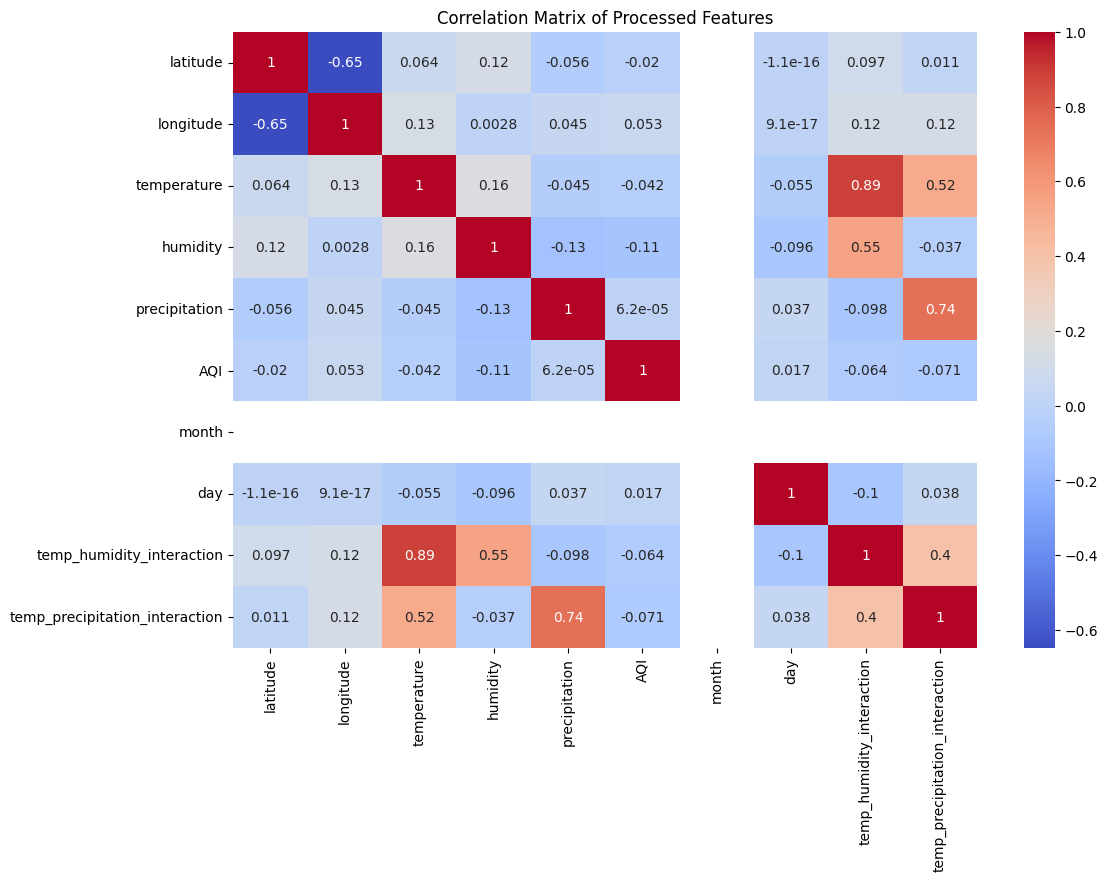

In [ ]:
# Feature Selection Insight (Correlation Matrix)
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Plot the correlation matrix to understand relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Processed Features")
plt.show()

In [ ]:

# Final Processed Data Overview
print(df)

          date      city    country  latitude  longitude  temperature  \
0   2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1   2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2   2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3   2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4   2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..         ...       ...        ...       ...        ...          ...   
145 2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146 2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147 2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148 2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149 2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  month  day  temp_humidity_interaction  \
0       43.13       0.288007  152      6    1  

In [ ]:
#Importing necessary Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# One-hot encode the categorical columns 'city' and 'country'
df = pd.get_dummies(df, columns=['city', 'country'], drop_first=True)
print(df)

          date  latitude  longitude  temperature  humidity  precipitation  \
0   2024-06-01   40.7128   -74.0060     5.261208     43.13       0.288007   
1   2024-06-01   51.5074    -0.1278    16.828661     63.49       0.849684   
2   2024-06-01   35.6895   139.6917    19.189069     54.23       1.560259   
3   2024-06-01  -33.8688   151.2093    12.814943     33.89       0.601335   
4   2024-06-01   19.0760    72.8777     9.848917     45.23       0.658809   
..         ...       ...        ...          ...       ...            ...   
145 2024-06-30   40.7128   -74.0060    13.522181     83.20       0.097998   
146 2024-06-30   51.5074    -0.1278    10.526193     31.66       0.141194   
147 2024-06-30   35.6895   139.6917     1.573264     64.73       0.179365   
148 2024-06-30  -33.8688   151.2093    17.722635     56.31       0.320157   
149 2024-06-30   19.0760    72.8777    -0.910156     70.32       0.077903   

     AQI  month  day  temp_humidity_interaction  \
0    152      6    1    

In [ ]:
# 1. Data Preparation
# Define the target variable and features
target = 'temperature'
# Drop columns that are not useful for model training (dropping 'date' and target from features)
features = df.drop(columns=['date', target])
y = df[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Random Forest Model Training
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 3. Predictions & Evaluation
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.2f}")

Random Forest Model Performance:
RMSE: 2.35
MAE:  1.96
R²:   0.88


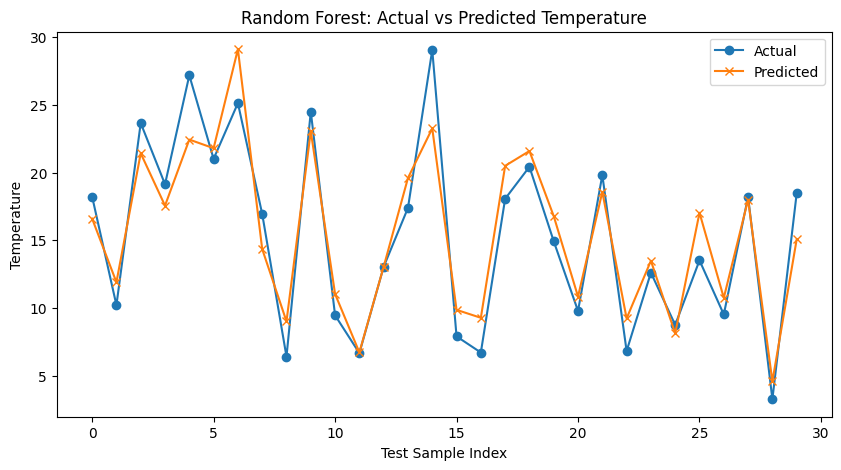

In [ ]:
# 4. Visualization: Actual vs. Predicted for Random Forest
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Random Forest: Actual vs Predicted Temperature")
plt.xlabel("Test Sample Index")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [ ]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [ ]:
# 1. Define the Parameter Grid for Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


In [ ]:
# 2. Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # scoring based on negative MSE
    n_jobs=-1,  # use all available cores
    verbose=1
)

In [ ]:
# 3. Fit GridSearchCV on the Training Data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and corresponding cross-validation RMSE
best_params = grid_search.best_params_
best_cv_rmse = np.sqrt(-grid_search.best_score_)  # convert negative MSE to RMSE

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation RMSE:", best_cv_rmse)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation RMSE: 4.5058214430766395


In [ ]:
# 4. Evaluate the Best Model on the Test Set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {test_rmse:.2f}")

Test RMSE: 3.49


In [ ]:
# Function to evaluate performance
def evaluate_performance(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²:  {r2:.2f}\n")

    return rmse, mae, r2

# Evaluate Random Forest model
rmse_rf, mae_rf, r2_rf = evaluate_performance(y_test, y_pred, "Random Forest")

Random Forest Performance:
RMSE: 3.49
MAE: 3.10
R²:  0.74



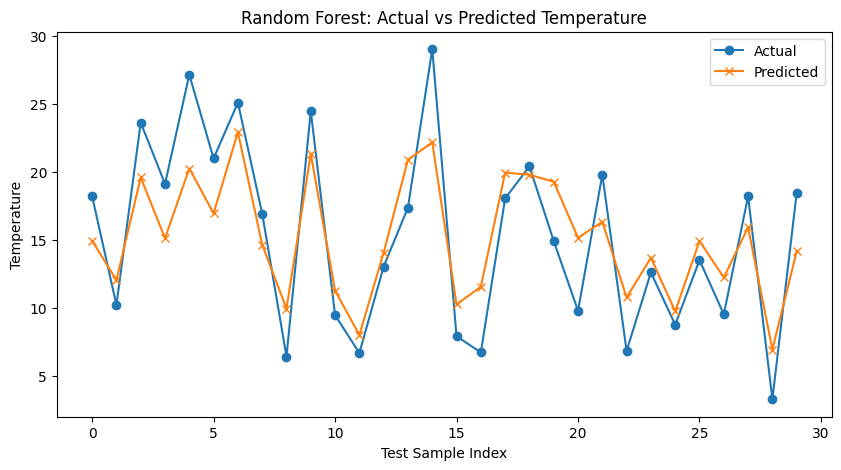

In [ ]:
# Visualization of Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Random Forest: Actual vs Predicted Temperature")
plt.xlabel("Test Sample Index")
plt.ylabel("Temperature")
plt.legend()
plt.show()
